In [25]:
!pip install textblob

In [26]:
from google.colab import files
uploaded = files.upload()


Saving NeutralPolitics_data.csv to NeutralPolitics_data (2).csv


In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from textblob import TextBlob
import pandas as pd

df = pd.read_csv('../data/NeutralPolitics_data.csv')


In [29]:
import os
print(os.listdir())

['.config', 'NeutralPolitics_data (2).csv', 'NeutralPolitics_data (1).csv', 'NeutralPolitics_data.csv', 'sample_data']


In [30]:
def analyze_sentiment(text):
  #convert everything to string so it can be processed
  text = str(text)
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity


  #values for whether classified as positive or negative
  sentiment = "Positive" if polarity > .05 else "Negative" if polarity < .05 else "Neutral"

  return {
      #determine polarity and sentiment of each
      'polarity' : polarity,
      'sentiment' : sentiment
  }
  #organize results

result = df['Body'].apply(analyze_sentiment)
sentiment_df = pd.json_normalize(result)
df = pd.concat([df, sentiment_df], axis = 1)

df['Body'] = df['Body'].fillna("")

avg_sentiment = df.groupby('sentiment')['polarity'].mean()
avg_neutral = df.groupby('sentiment')['polarity'].mean()
overall_sentiment = df['sentiment'].value_counts().idxmax()


print('Neutral Politics average' , avg_sentiment)
print("Overall sentiment:" , overall_sentiment)
print(df[['Body', 'polarity', 'sentiment']].head(10))


Neutral Politics average sentiment
Negative   -0.029267
Neutral     0.050000
Positive    0.135218
Name: polarity, dtype: float64
Overall sentiment: Positive
                                                Body  polarity sentiment
0  EDIT:\n\nTo those joining us from r/all and r/...  0.119589  Positive
1  ##**Due to the attention this topic has been g...  0.056119  Positive
2  Hello and welcome to our first ever debate fac...  0.202431  Positive
3  ##[This is the report.](https://www.justice.go... -0.061080  Negative
4  ["CNN and other news outlets were blocked Frid...  0.103725  Positive
5  Per [this report](https://www.washingtonpost.c...  0.036905  Negative
6  **[Link to full bill](https://housegop.leadpag...  0.121733  Positive
7  The New York Times has gained access to an ema...  0.187410  Positive
8  Tuesday, November 6, 2018 is the day of the [m... -0.011607  Negative
9  Tonight [President Trump fired FBI director Ja...  0.046050  Negative


In [7]:
print(df[['polarity', 'sentiment']].head(10))


   polarity sentiment
0  0.119589  Positive
1  0.056119  Positive
2  0.202431  Positive
3 -0.061080  Negative
4  0.103725  Positive
5  0.036905  Negative
6  0.121733  Positive
7  0.187410  Positive
8 -0.011607  Negative
9  0.046050  Negative


<ipython-input-8-6f172578a7ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'sentiment', y = 'polarity', data = df,palette = "coolwarm")


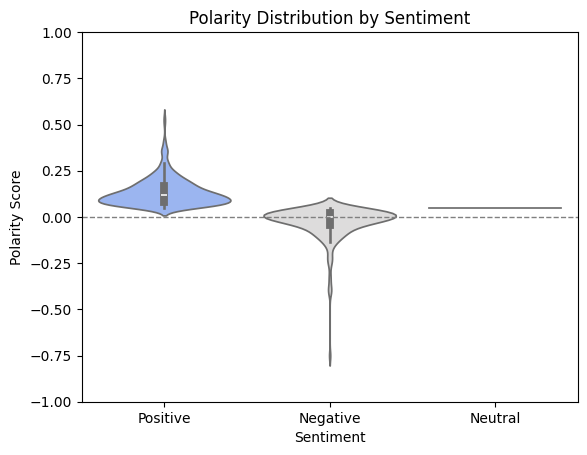

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#violinplot shows how polarity varies in each sentiment category
sns.violinplot(x = 'sentiment', y = 'polarity', data = df,palette = "coolwarm")
plt.title('Polarity Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Polarity Score')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

<ipython-input-9-1996c496c2af>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='Upvotes', data=upvotes_df, palette='coolwarm')


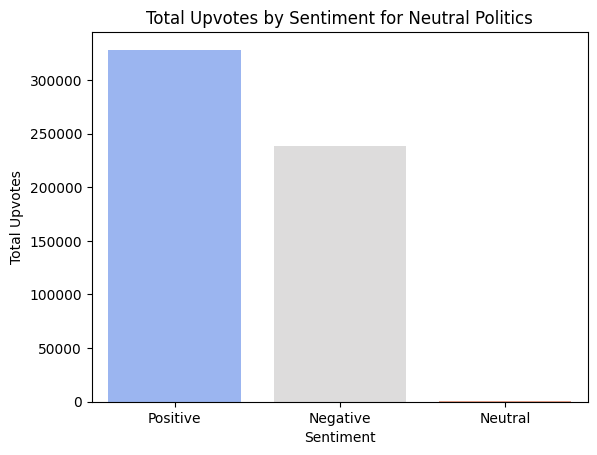

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#bar chart shows how many upvotes each kind of sentiment gets

upvotes = df.groupby('sentiment')['Upvotes'].sum().sort_values(ascending=False)

# convert the 'upvotes' Series into a DataFrame to be used in sns.barplot
upvotes_df = upvotes.reset_index()

#  use the DataFrame in sns.barplot
sns.barplot(x='sentiment', y='Upvotes', data=upvotes_df, palette='coolwarm')

plt.title('Total Upvotes by Sentiment for Neutral Politics')
plt.xlabel('Sentiment')
plt.ylabel('Total Upvotes')
plt.show()



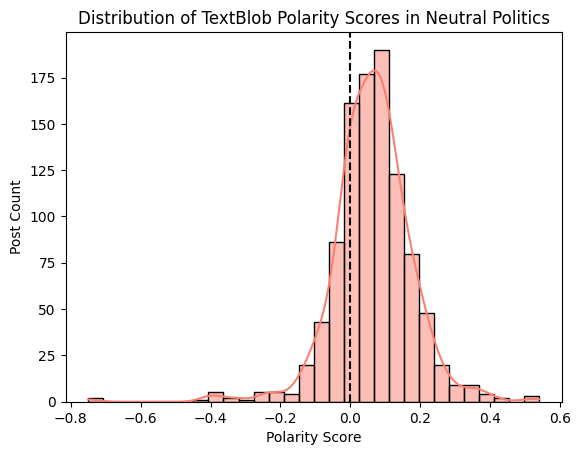

In [11]:
sns.histplot(df['polarity'], bins=30, kde=True, color='salmon')
plt.title('Distribution of TextBlob Polarity Scores in Neutral Politics')
plt.xlabel('Polarity Score')
plt.ylabel('Post Count')
plt.axvline(0, color='black', linestyle='--')
plt.show()
